# Genetic Disorder Patient Data EDA

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



import sys
sys.path.insert(1, '/Users/swechakranthi/Desktop/Github/DataScience-Capstone2-Housing/library')
from sb_utils import save_file

In [2]:
#1.1 Data Loading

# the supplied CSV data file is the raw_data directory
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

## 2. Data Overview

In [3]:
# Check data count and view data
print(f'Number of rows in Training Set: {train_data.shape[0]}')
print(f'Number of rows in Test Set: {test_data.shape[0]} ')

Number of rows in Training Set: 22083
Number of rows in Test Set: 9465 


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

#### We want to deal with special characters in column names early on:

In [5]:
train_data.columns = train_data.columns.str.replace('\'', '')
train_data.columns = train_data.columns.str.replace(' ', '_')

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood_cell_count_(mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mothers_age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Fathers_age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test_1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test_5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No._of_previous_abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [7]:
# Counts of unique values
uniqueValues = train_data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Patient_Id                                          22083
Patient_Age                                            15
Genes_in_mothers_side                                   2
Inherited_from_father                                   2
Maternal_gene                                           2
Paternal_gene                                           2
Blood_cell_count_(mcL)                              22083
Patient_First_Name                                   2524
Family_Name                                          6282
Fathers_name                                        16368
Mothers_age                                            34
Fathers_age                                            45
Institute_Name                                         27
Location_of_Institute                                  26
Status                                                  2
Respiratory_Rate_(breaths/min)                          2
Heart_Rate_(rates/min           

In [8]:
#initial data exploration via a pandas profile
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from pandas_profiling import ProfileReport


In [9]:
#profile = ProfileReport(train_data, title="Pandas Profiling Report", minimal=True, check_correlation=False)
#profile.to_widgets()
profile_report = train_data.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report.to_file("Genetic_Data_Report.html")
#,correlations={"cramers": {"calculate": False}}


Summarize dataset:   0%|          | 0/59 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#list the null value count of all columns
pd.set_option('display.max_rows', 90)
print("List of null values for each column: \n")
Missing_count = train_data.isna().sum().sort_values(ascending = False)[:25]
missing = pd.concat([Missing_count, (Missing_count/len(train_data))*100], axis=1, keys = ["count", "%"])
missing_type = pd.concat([train_data.isna().sum().sort_values(ascending = False), (train_data.isna().sum().sort_values(ascending = False)/len(train_data))*100,train_data.dtypes], axis=1, keys = ["count", "%", "types"])
print(missing_type.sort_values(by=["count"], ascending = False))
print('***********************************************************************')

print(f'Number of duplicate rows: {train_data.duplicated().sum()} ')


print(f'null row counts: {missing.astype(bool).sum(axis=0)}')



List of null values for each column: 

                                                  count          %    types
Family_Name                                        9691  43.884436   object
Mothers_age                                        6036  27.333243  float64
Fathers_age                                        5986  27.106824  float64
Institute_Name                                     5106  23.121858   object
Maternal_gene                                      2810  12.724720   object
Symptom_2                                          2222  10.062039  float64
H/O_substance_abuse                                2195   9.939773   object
Gender                                             2173   9.840149   object
History_of_anomalies_in_previous_pregnancies       2172   9.835620   object
Test_5                                             2170   9.826563  float64
Disorder_Subclass                                  2168   9.817507   object
Follow-up                                        

The Data has no duplicate values, multiple columns with missing values, and a set un-necessary columns with no useful information

### Remove irrelavant columns

These columns provide no information regarding the disease and are primarily patient data

In [11]:
# Lets drop the columns that dont provide any important information
train_data.drop(["Patient_Id","Patient_First_Name","Family_Name","Fathers_name","Location_of_Institute",
          "Institute_Name"],inplace=True,axis=1)

In [12]:
train_data.drop(["Test_1","Test_2","Test_3","Test_4","Test_5","Symptom_1","Symptom_2",
           "Symptom_3","Symptom_4","Symptom_5"],inplace=True,axis=1)

## 3. LET'S EXPLORE

#### Since we are only exploring data, we are not gonna do any further cleaning, but these are the cleaning steps that need to be addressed in pre-processing:
 - Fix and Replace Missing Values
 - Adjust the column names and remove spaces and (') as needed
 - Check and adjust data skewness
 - Encode any catagorical data depending on the chosen method of supervised learning
 - Normalize or standardize data as needed


In [13]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

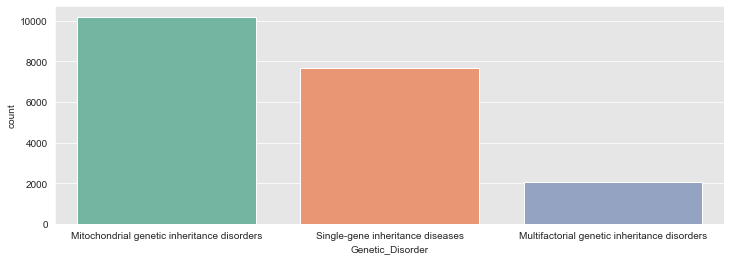

In [14]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = train_data, palette = "Set2", order = train_data['Genetic_Disorder'].value_counts().index);

In [15]:
train_data['Genetic_Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic_Disorder, dtype: int64

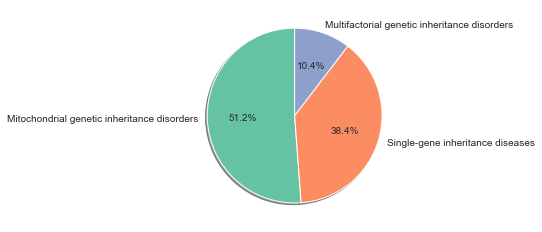

In [16]:
colors = colors = sns.color_palette('Set2')
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'

pie_chart = plt.pie(train_data['Genetic_Disorder'].value_counts(), explode=(0, 0, 0),labels=labels1, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.tight_layout()

<AxesSubplot:xlabel='Disorder_Subclass', ylabel='count'>

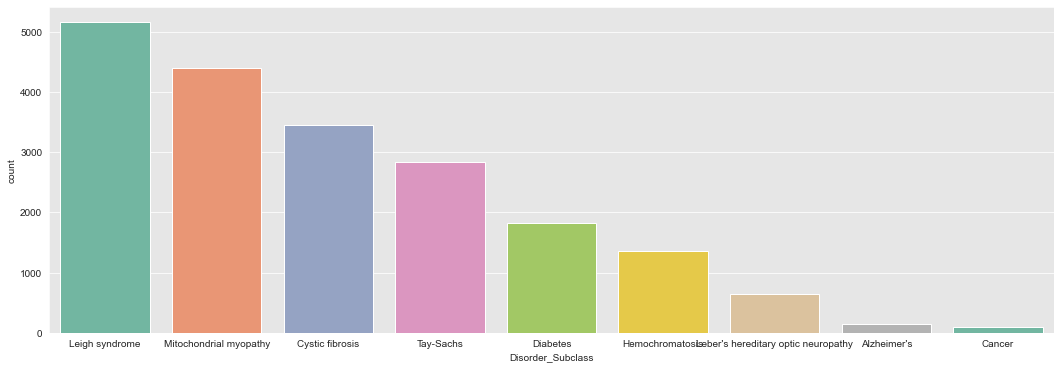

In [17]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = train_data, palette = "Set2", order = train_data['Disorder_Subclass'].value_counts().index)

### Plot major indicators against the 3 major Genetic Disorder Categories

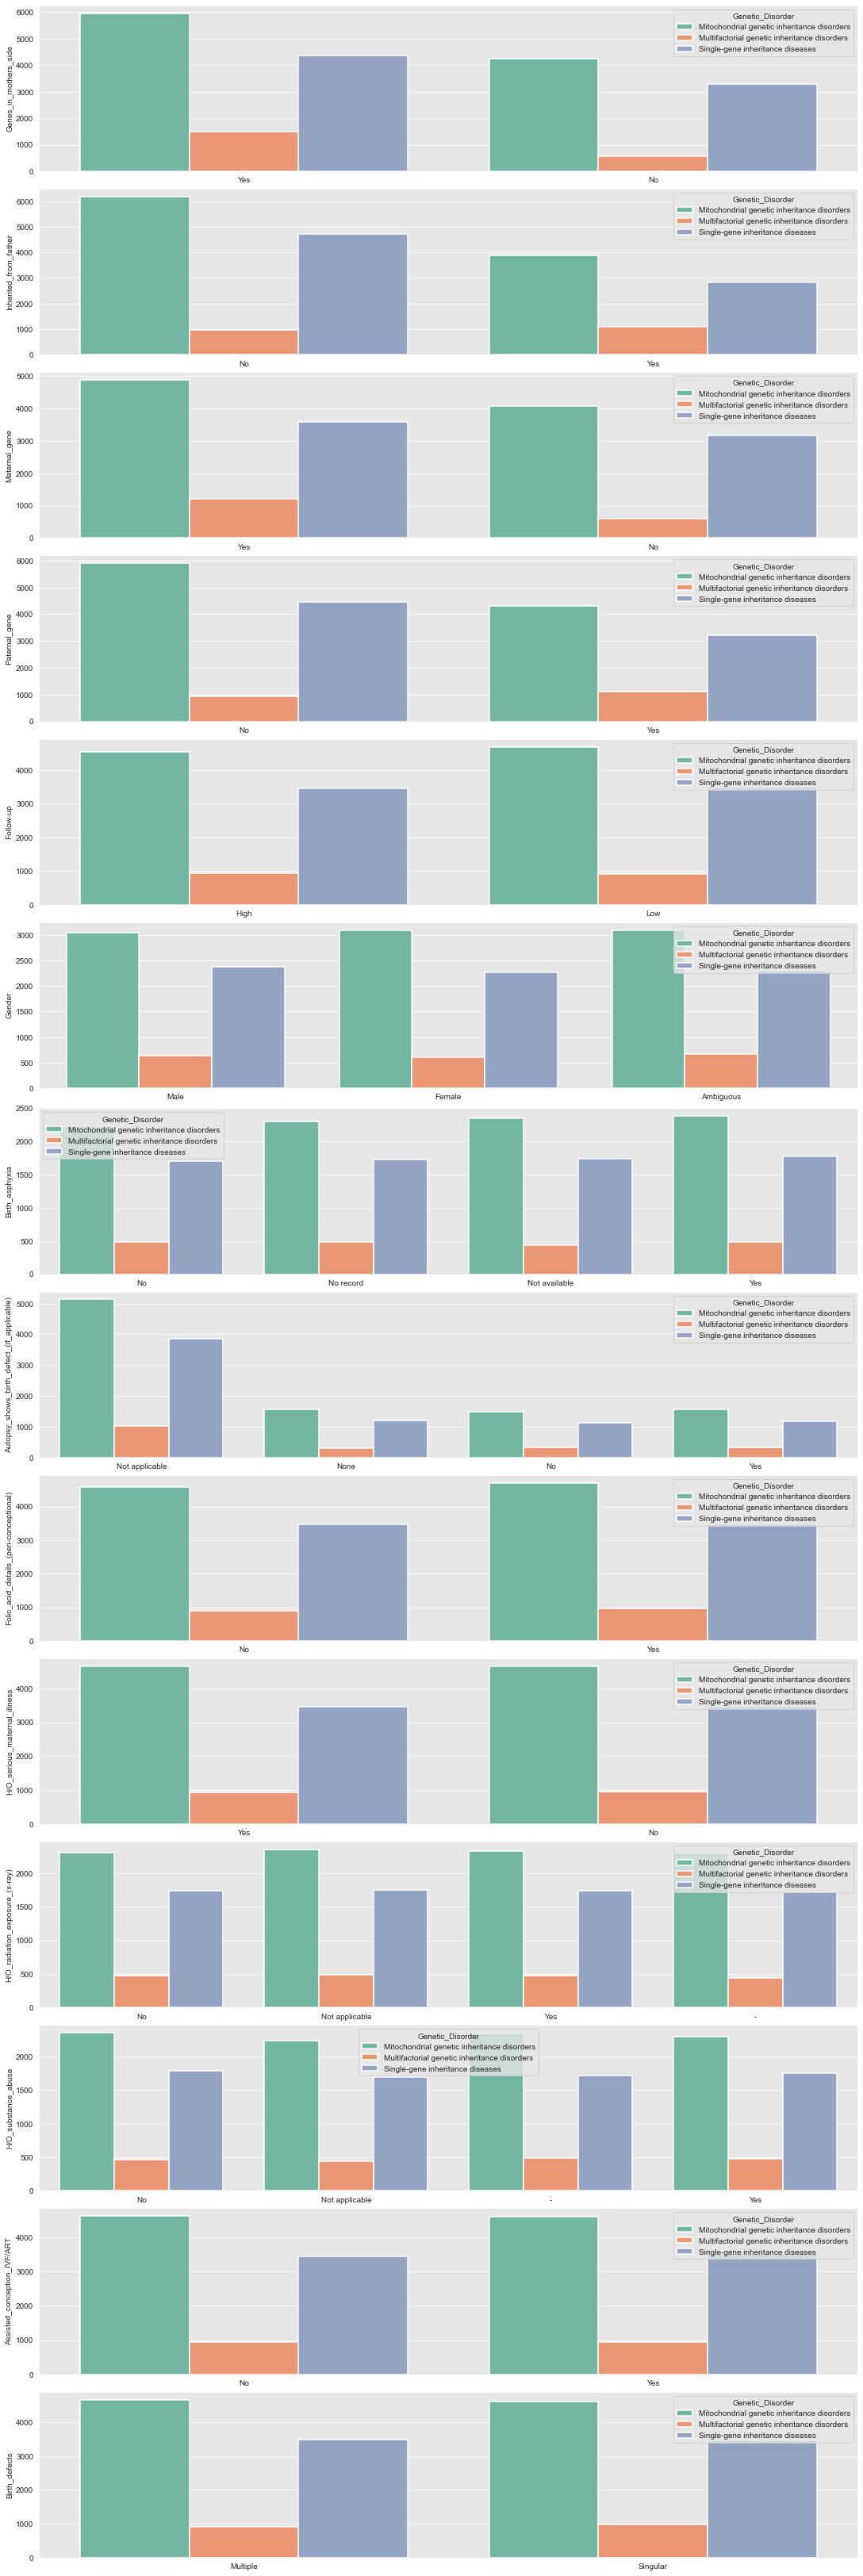

In [18]:
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
         'Follow-up', 'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect_(if_applicable)', 'Folic_acid_details_(peri-conceptional)', 'H/O_serious_maternal_illness',
         'H/O_radiation_exposure_(x-ray)', 'H/O_substance_abuse', 'Assisted_conception_IVF/ART', 'Birth_defects']



fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train_data, x = var, hue = 'Genetic_Disorder', palette = "Set2", ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

### Plot major indicators against the Disorder Subclass

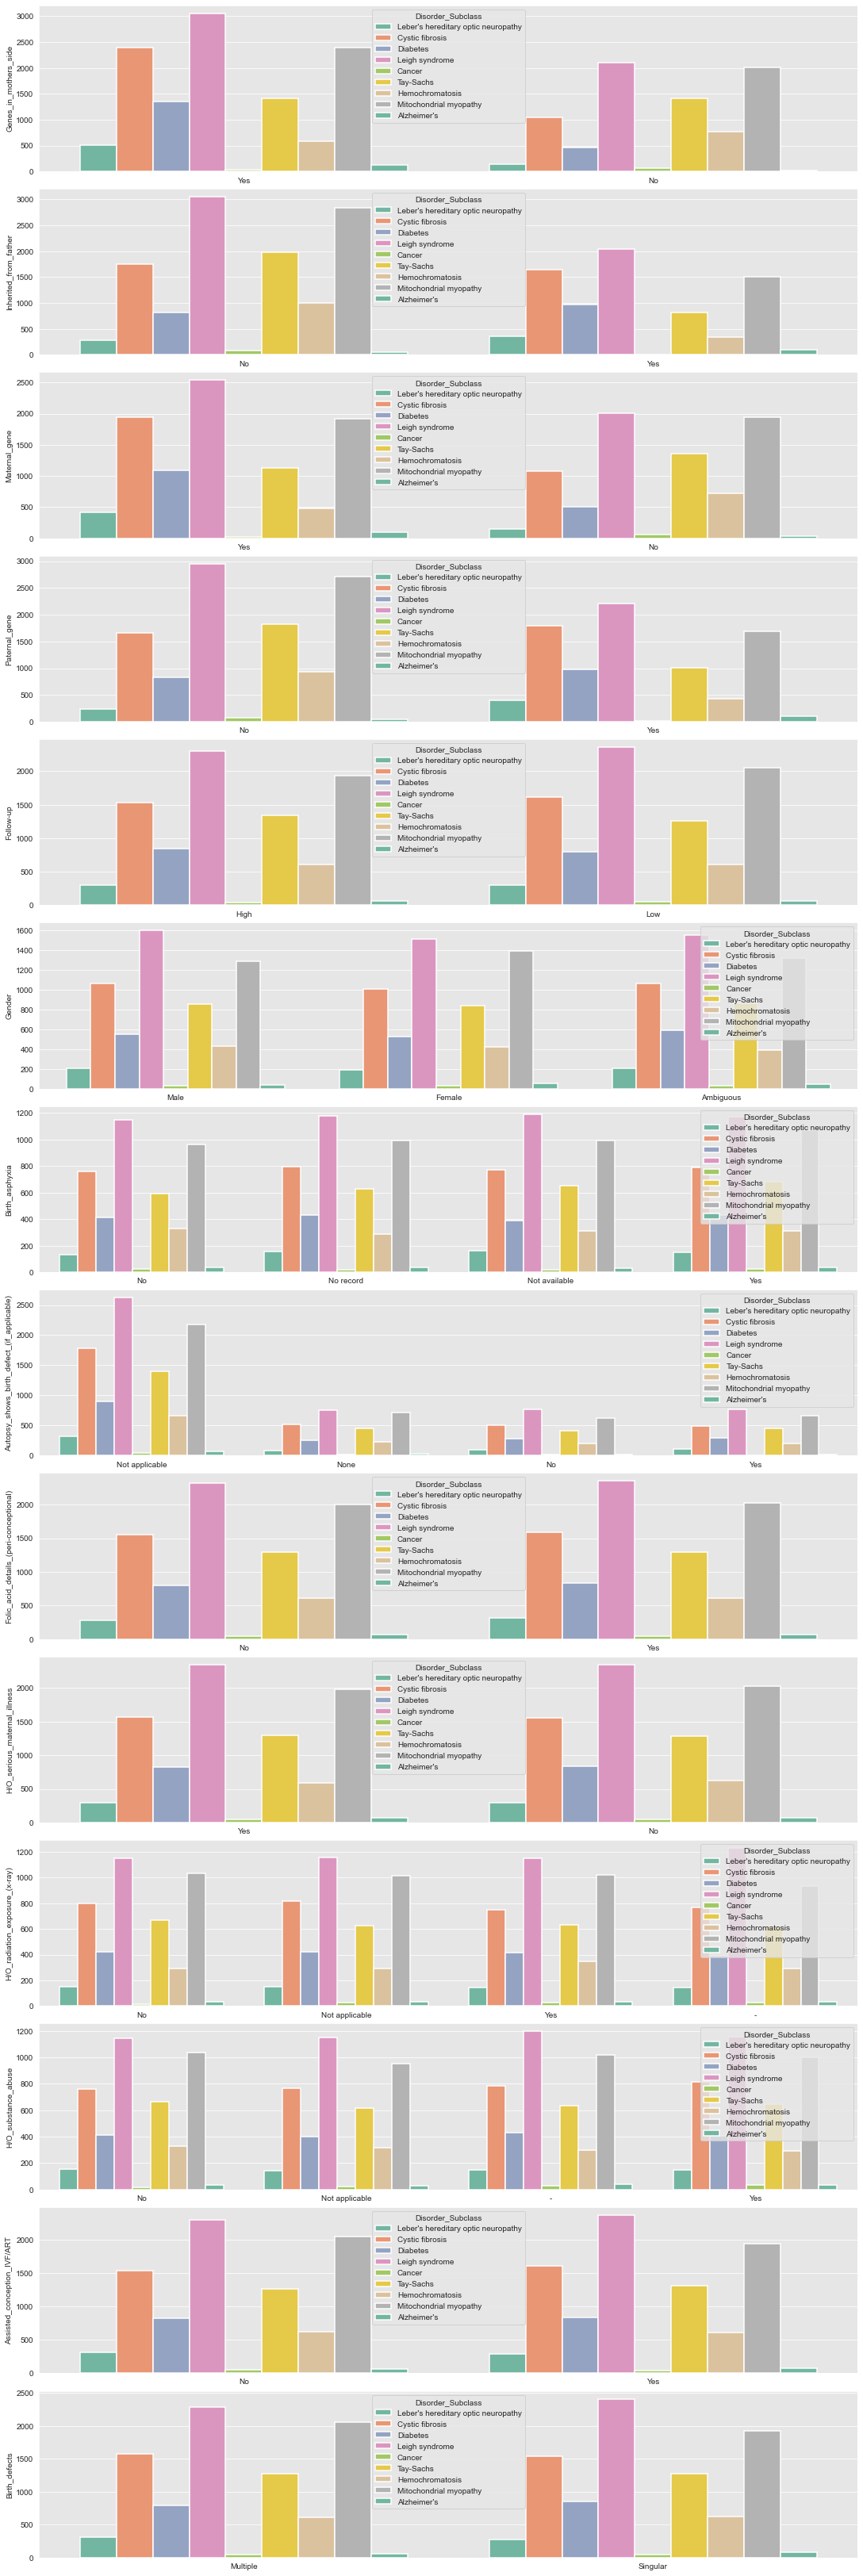

In [19]:
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
         'Follow-up', 'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect_(if_applicable)', 'Folic_acid_details_(peri-conceptional)', 'H/O_serious_maternal_illness',
         'H/O_radiation_exposure_(x-ray)', 'H/O_substance_abuse', 'Assisted_conception_IVF/ART', 'Birth_defects']



fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train_data, x = var, hue = 'Disorder_Subclass', palette = "Set2", ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

### Look at Correlations in the pandas profiling report